<a href="https://colab.research.google.com/github/alejandrolq/StaticalLearningII-Practica1/blob/main/Practica1_KMeans_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Statical Learning II**

**Sección U**

**Práctica 1**

## Importando librías necesarias

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.cluster import KMeans
from matplotlib.colors import LogNorm

## Leyendo datos de estaturas normales

In [3]:
df = pd.read_csv('estaturas_normales.csv', sep=',',header=None)
datos = df.to_numpy()
datos

array([[ 1.77, 26.  ],
       [ 1.74, 31.  ],
       [ 1.72, 24.  ],
       [ 1.78, 34.  ],
       [ 1.65, 32.  ],
       [ 1.66, 29.  ],
       [ 1.64, 27.  ],
       [ 1.85, 34.  ],
       [ 1.85, 26.  ],
       [ 1.75, 21.  ],
       [ 1.73, 23.  ],
       [ 1.79, 25.  ],
       [ 1.82, 24.  ],
       [ 1.65, 25.  ],
       [ 1.79, 25.  ],
       [ 1.72, 34.  ],
       [ 1.7 , 26.  ],
       [ 1.57, 25.  ],
       [ 1.66, 26.  ],
       [ 1.75, 27.  ],
       [ 1.77, 32.  ],
       [ 1.8 , 40.  ],
       [ 1.85, 25.  ],
       [ 1.82, 24.  ],
       [ 1.75, 38.  ],
       [ 1.73, 34.  ],
       [ 1.55, 29.  ],
       [ 1.76, 28.  ],
       [ 1.68, 27.  ],
       [ 1.65, 30.  ],
       [ 1.72, 26.  ],
       [ 1.9 , 24.  ],
       [ 1.74, 34.  ],
       [ 1.73, 33.  ],
       [ 1.83, 53.  ],
       [ 1.65, 28.  ],
       [ 1.73, 24.  ],
       [ 1.73, 22.  ],
       [ 1.73, 23.  ],
       [ 1.65, 43.  ],
       [ 1.72, 26.  ],
       [ 1.63, 31.  ]])

## Graficando datos

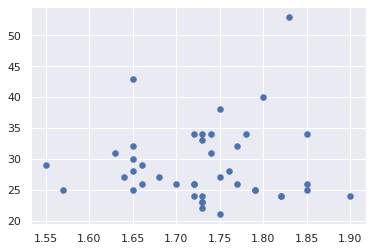

In [3]:
plt.scatter(datos[:,0], datos[:,1], s=30)
plt.show()

## Definiendo la clase para la implementación de K - Means

In [4]:
class K_means:
  def __init__(self, k=2, tol=0.001, max_iter=300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter
    self.inertia = 0

  def fit(self, data):
    # Reordenando de forma aleatoria los datos
    indx=np.arange(len(data))
    np.random.shuffle(indx)
    data = data[indx]

    # Creando un diccionario vacío para almacenar los centroides
    self.centroids = {}

    # Se seleccciona k puntos que pertenecen al dataset como centroides para la clasificación
    for k_i in range(self.k):
      self.centroids[k_i] = data[k_i]

    # Iteración para clasificar los datos
    for iteration in range(self.max_iter):
      # Se crea un diccionario para clasificar los datos  
      self.classifications = {}
      self.inertia = 0

      # Se crea los k grupos para la clasificación
      for k_i in range(self.k):
        self.classifications[k_i] = []

      # Se itera sobre la lista de datos
      for row in data:
        # Se declara una lista que contendra las distancias calculadas
        distances = []

        # Se itera para los k centroides
        for centroid in self.centroids:
          # Se agrega la distancia a la lista distances calculadas con norm 
          norm = np.linalg.norm(row-self.centroids[centroid])
          distances.append(norm)
          # Se obtiene el indice de la distancia minima hacia los centroides
          # y se almacena los datos en el diccionario en la clasificacion que 
          # corresponde
          classification = distances.index(min(distances))
          ## Se calcula la inercia para cada dato y los centroides
          self.inertia += min(distances)**2
          self.classifications[classification].append(row)
      
      # Se guarda el dato de los centroides anteriores
      prev_centroids = dict(self.centroids)

      # Para cada k se calcula de nuevo el centroide realizando el promedio de 
      # los datos clasificados
      for classification in self.classifications:
        self.centroids[classification] = np.average(self.classifications[classification],axis=0)
      
      # Se calcula para cada centroide el valor de tolerancia para la convergencia
      for centroid in self.centroids:
        init_centroid = prev_centroids[centroid]
        curr_centroid = self.centroids[centroid]
        tolerance = np.sum((abs((curr_centroid - init_centroid))/init_centroid)*100.0)
        if tolerance > self.tol:
          flag = False
        else:
          flag = True
      
      if flag:
        print(iteration, tolerance)
        break
    print(self.centroids)  
  
  def predict(self, data):
    classes = []
    for row in data:
      distances = []
      for centroid in self.centroids:
        norm = np.linalg.norm(row-self.centroids[centroid])
        distances.append(norm)
      classification = distances.index(min(distances))
      classes.append([classification])
    return np.array(classes)

In [5]:
def plot_model(model):
  for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=5)
  colors = ['red', 'blue', 'green', 'yellow', 'black', 'violet']

  for classification in model.classifications:
      color = colors[classification]
      for featureset in model.classifications[classification]:
          plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=50, linewidths=5)
          
  plt.show()

### Experimentos para determinar K

#### Experimento 1: K=2

In [6]:
model = K_means(k=2)
model.fit(datos)

4 0.0
{0: array([ 1.72704918, 30.57377049]), 1: array([ 1.74217391, 24.82608696])}


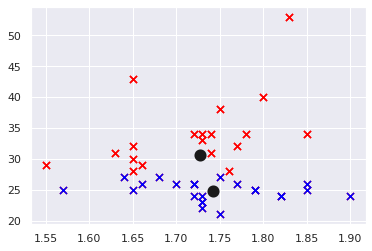

In [7]:
plot_model(model)

#### Expermiento 2: K=3

In [6]:
model = K_means(k=3)
model.fit(datos)

2 0.0
{0: array([ 1.72109756, 27.82926829]), 1: array([ 1.75, 36.75]), 2: array([ 1.75, 24.5 ])}


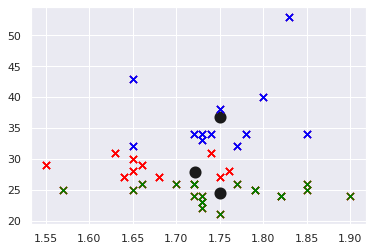

In [7]:
plot_model(model)

#### Expermiento 3: K=4 Tolerance 0.001

In [10]:
model = K_means(k=4)
model.fit(datos)

4 0.0
{0: array([ 1.73395349, 32.40697674]), 1: array([ 1.72357143, 25.75      ]), 2: array([ 1.77      , 23.22222222]), 3: array([ 1.6675, 28.125 ])}


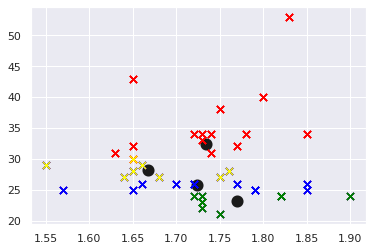

In [11]:
plot_model(model)

#### Expermiento 4: K=5

In [12]:
model = K_means(k=5)
model.fit(datos)

3 0.0
{0: array([ 1.73412371, 32.51546392]), 1: array([ 1.72232877, 25.82191781]), 2: array([ 1.77      , 23.22222222]), 3: array([ 1.654, 28.8  ]), 4: array([ 1.76      , 45.33333333])}


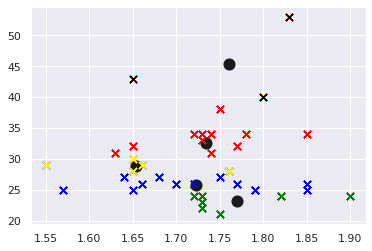

In [13]:
plot_model(model)

#### Expermiento 5: K=5

In [14]:
model = K_means(k=6)
model.fit(datos)

3 0.0
{0: array([ 1.72483221, 26.67785235]), 1: array([ 1.72847458, 33.37288136]), 2: array([ 1.768, 40.8  ]), 3: array([ 1.74, 48.  ]), 4: array([ 1.75916667, 24.125     ]), 5: array([ 1.735, 22.25 ])}


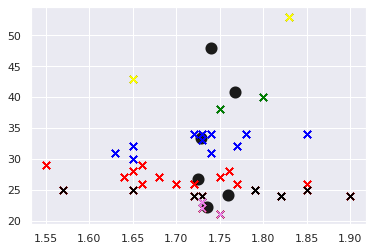

In [15]:
plot_model(model)

### Comparando resultados de clase creada de KMeans vs KMeans utilizando Sklearn

In [16]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(datos)
y_kmeans = kmeans.predict(datos)

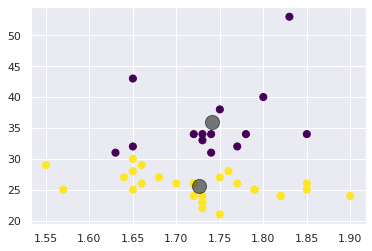

In [17]:
plt.scatter(datos[:, 0], datos[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Implementando GMM utilizando Sklearn

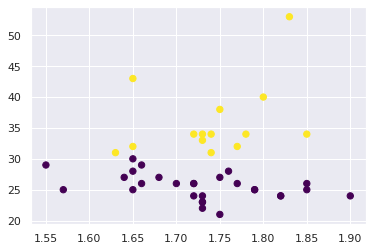

In [8]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(datos)
labels = gmm.predict(datos)
plt.scatter(datos[:, 0], datos[:, 1], c=labels, s=40, cmap='viridis')

### Experimentos para determinar K

#### Experimento 1: K=2

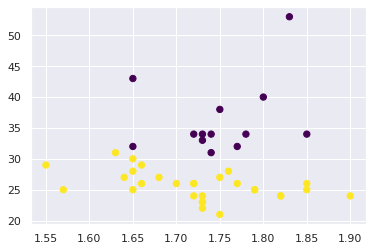

In [27]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(datos)
labels = gmm.predict(datos)
plt.scatter(datos[:, 0], datos[:, 1], c=labels, s=40, cmap='viridis')

#### Experimento 2: K=3

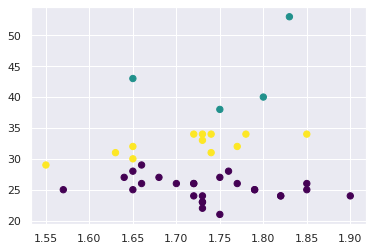

In [9]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(datos)
labels = gmm.predict(datos)
plt.scatter(datos[:, 0], datos[:, 1], c=labels, s=40, cmap='viridis')

#### Experimento 3: K=4

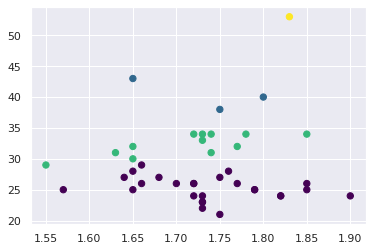

In [21]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full')
gmm.fit(datos)
labels = gmm.predict(datos)
plt.scatter(datos[:, 0], datos[:, 1], c=labels, s=40, cmap='viridis')

#### Experimento 4: K=5

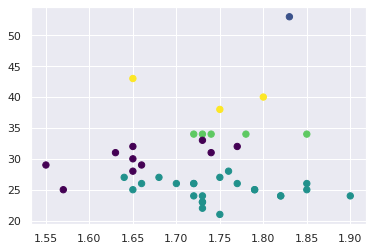

In [22]:
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full')
gmm.fit(datos)
labels = gmm.predict(datos)
plt.scatter(datos[:, 0], datos[:, 1], c=labels, s=40, cmap='viridis')

#### Experimento 5: K=6

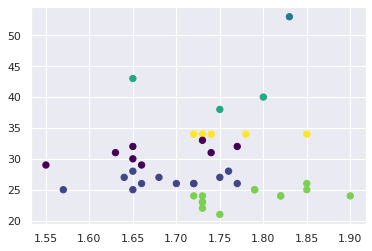

In [23]:
gmm = mixture.GaussianMixture(n_components=6, covariance_type='full')
gmm.fit(datos)
labels = gmm.predict(datos)
plt.scatter(datos[:, 0], datos[:, 1], c=labels, s=40, cmap='viridis')

## Selección de K para los modelos

Se tiene que para los experimentos con K=2 y K=3 si es posible asignar una categoria para los datos ya que cada punto se distribuye de manera correcta y cada categoria cuenta con mas de un dato asignado, se puede observar que los centroides para K = 2 estan ubicados de la siguientes forma:

- Categoria 0: (1.72704918, 30.57377049) 
- Categoria 1: (1.74217391, 24.82608696)

Para K = 3 los centroides estan ubicados de la siguiente forma:

- Categoria 0: (1.72163043, 27.89130435) 
- Categoria 1: (1.758, 37.7)
- Categoria 2: (1.75571429, 23.85714286)

Por lo que K=2 y K=3 son los candidatos mas probables para ser utilizados para este modelo.

## Análisis método del codo

Se tiene que el método del codo utiliza los valores de la inercia obtenidos tras aplicar K-means a diferente número de Clusters K (desde 1 a N Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide:

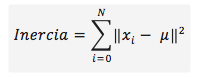

Una vez se obtienen los valores de la inercia tras aplicar el K-means de 1 a N Clusters, estos se representan en una gráfica lineal la inercia respecto del número de Clusters. En esta gráfica se debería de apreciar un cambio brusco en la evolución de la inercia, teniendo la línea representada una forma similar a la de un brazo y su codo. El punto en el que se observa ese cambio brusco en la inercia indica el número óptimo de Clusters a seleccionar para ese data set. En otras palabras, el punto que representaría al codo del brazo en la gráfica será el número óptimo de Clusters para ese data set.

### Aplicando el método del codo al dataset



In [31]:
def plot_results(inertials):
  x, y = zip(*[inertia for inertia in inertials])
  plt.plot(x, y, 'ro-', markersize=8, lw=2)
  plt.grid(True)
  plt.xlabel('Numero de Clusters')
  plt.ylabel('Inercia')
  plt.show()

1600.2400404761904
591.1840966666667
244.11698148148145
131.651225025641
71.13596330336331


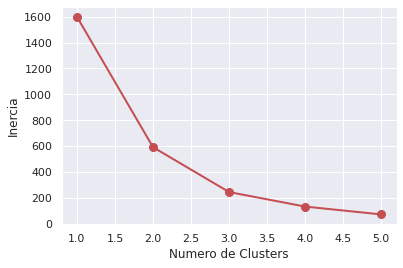

In [32]:
inertia_clusters = []
for i in range(1, 6, 1):
    model = K_means(k=i)
    model.fit(datos)
    print(model.inertia)
    inertia_clusters.append([i, model.inertia])

plot_results(inertia_clusters)

Se obtiene a tráves del método del codo que el valor optimo de K es 3 ya que sobre ese punto se observa el cambio de la incercia del dataset. Por lo tanto se determina que este método es adecuado para este problema ya que los datos obtenidos tienen relación con la selección de K en la sección anterior.

## Predicciones para los datos valtest

### Leyendo los datos valtest

In [10]:
df_valtest = pd.read_csv('estaturas_valtest.csv', sep=',',header=None)
datos_valtest = df_valtest.to_numpy()
datos_valtest

array([[ 1.82, 25.  ],
       [ 1.8 , 27.  ],
       [ 1.6 , 31.  ],
       [ 1.6 , 35.  ],
       [ 1.82, 30.  ],
       [ 1.76, 32.  ],
       [ 1.79, 31.  ],
       [ 1.61, 31.  ]])

### Predicciones para los datos utilizando el modelo creado con K-means

In [11]:
model.predict(datos_valtest)

array([[2],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

### Probabilidades para los datos utilizando el modelo creado con GMM

In [13]:
probs = gmm.predict_proba(datos_valtest)
probs.round(3)

array([[1.   , 0.   , 0.   ],
       [0.997, 0.003, 0.   ],
       [0.062, 0.022, 0.916],
       [0.001, 0.987, 0.013],
       [0.703, 0.242, 0.055],
       [0.001, 0.034, 0.964],
       [0.048, 0.145, 0.806],
       [0.051, 0.022, 0.927]])

## Estimación de Monte Carlo utilizando GMM

In [14]:
def f(X):
  x1 = X[:,0]
  x2 = X[:,1]
  return np.divide(x1,x2).reshape(len(x1),1)

In [15]:
f(datos_valtest)
muestra,cluster = gmm.sample(1000)
muestra_f = f(muestra)
valor_esperado_f = np.mean(muestra_f)

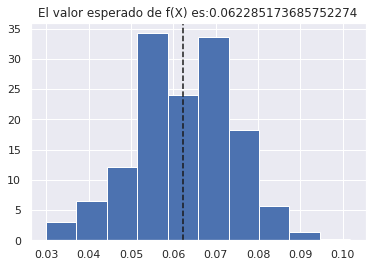

In [16]:
plt.hist(muestra_f, density=True)
plt.axvline(valor_esperado_f,color="k",linestyle="--")
plt.title("El valor esperado de f(X) es:{}".format(valor_esperado_f))

plt.show()

## Conclusiones

- Los modelos implementados con K-means dependen de la tolerancia escogida para su convergencia.
- El método del codo es útil para seleccionar el mejor valor de K y es un método gráfico en donde se selecciona el valor en donde se presenta el mayor cambio.
- Los modelos GMM pueden ser utilizados como modelos generativos.

## Referencias

- Shapiro, D., PhD. (2018, June 20). Elbow Clustering for Artificial Intelligence - Towards Data Science. Medium. https://towardsdatascience.com/elbow-clustering-for-artificial-intelligence-be9c641d9cf8
- VanderPlas, J. (2020). In Depth: Gaussian Mixture Models | Python Data Science Handbook. Python Data Science Handbook. https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
